In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and clean data
df = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
print(f"Original data shape: {df.shape}")

Original data shape: (375, 6)


In [3]:
# Data cleaning
df = df.dropna()
df = df[df['Salary'] > 1000]  # Remove obvious outlier
print(f"Cleaned data shape: {df.shape}")

Cleaned data shape: (372, 6)


In [ ]:
# Exploratory Data Analysis
print("\nBasic statistics:")
print(df.describe())

print("\nEducation Level distribution:")
print(df['Education Level'].value_counts())



Basic statistics:
              Age  Years of Experience         Salary
count  372.000000           372.000000     372.000000
mean    37.454301            10.053763  100846.774194
std      7.065009             6.550843   48023.137565
min     23.000000             0.000000   30000.000000
25%     31.750000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000

Education Level distribution:
Education Level
Bachelor's    223
Master's       98
PhD            51
Name: count, dtype: int64


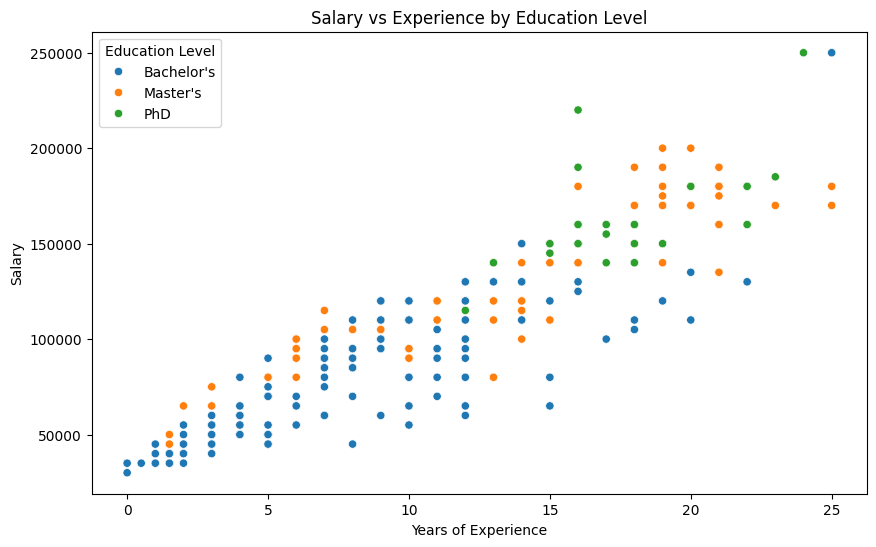

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Education Level', data=df)
plt.title('Salary vs Experience by Education Level')
plt.show()

In [ ]:
# Prepare features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing
numerical_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"- Mean Absolute Error: ${mae:,.2f}")
print(f"- R2 Score: {r2:.2f}")

Model Performance:
- Mean Absolute Error: $9,727.91
- R2 Score: 0.88


In [ ]:
# Save model
joblib.dump(model, 'salary_predictor.pkl')
print("Model saved as 'salary_predictor.pkl'")

Model saved as 'salary_predictor.pkl'
